In [1]:
import gym
import numpy as np
import pandas as pd
from collections import defaultdict
from plotting import plot_values

In [2]:
env = gym.make('Blackjack-v0')

In [3]:
def epsilon_greedy_policy(action_value, epsilon, number_actions):
    """
    Generate epsilon greedy policy given action value function and epsilon
    """
    def policy(observation):
        actions = np.full(number_actions, epsilon/number_actions,)
        best_action = np.argmax(action_value[observation])
        actions[best_action] = actions[best_action] + (1 - epsilon)
        return actions
    return policy

In [4]:
def generate_episode(env, policy, epsilon, number_actions):
    """
    Generate an episode (state, action, reward)
    """
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np.arange(len(policy(state))), p = policy(state))
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        if done:
            break;
        state = next_state
    
    return episode

In [5]:
def accumulated_reward(episode, returns, returns_count, value_function, gamma):
    appearance = []
    all_reward = 0
    
    for x in episode:
        appearance.append((x[0], x[1]))
    states_in_episode = set(appearance)
    
    for state, action in states_in_episode:
        
        first_appearance = next(i for i,x in enumerate(episode) if x[0] == state and x[1] == action)
        for i, x in enumerate(episode[first_appearance:]):
            all_reward += x[2] * (gamma ** i)      
        returns[(state, action)] = returns[(state, action)] + all_reward
        returns_count[(state, action)] = returns_count[(state, action)] + 1
        value_function[state][action] = returns[(state, action)]/returns_count[(state, action)]

    return value_function

In [6]:
def monte_carlo_epsilon(env, num_episodes, gamma, epsilon):
    """
    Calculate the value function while find the optimal policy
    """
    returns = defaultdict(float)
    returns_count = defaultdict(float)
    q_table = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = epsilon_greedy_policy(q_table, epsilon, env.action_space.n)
    
    for i in range(num_episodes):
        episode = generate_episode(env, policy, epsilon, env.action_space.n)
        q_table = accumulated_reward(episode, returns, returns_count, q_table, gamma)
    return q_table, policy

In [7]:
def assembly(env, num_episodes, gammar, epsilon):
    Q, policy = monte_carlo_epsilon(env, num_episodes=num_episodes, gamma=gammar, epsilon=epsilon)
    value_function = {}
    for state, action in Q.items():
        value_function[state] = np.max(action)
    plot_values(value_function, str(str(num_episodes) + " Steps with epsilon " + str(epsilon)))

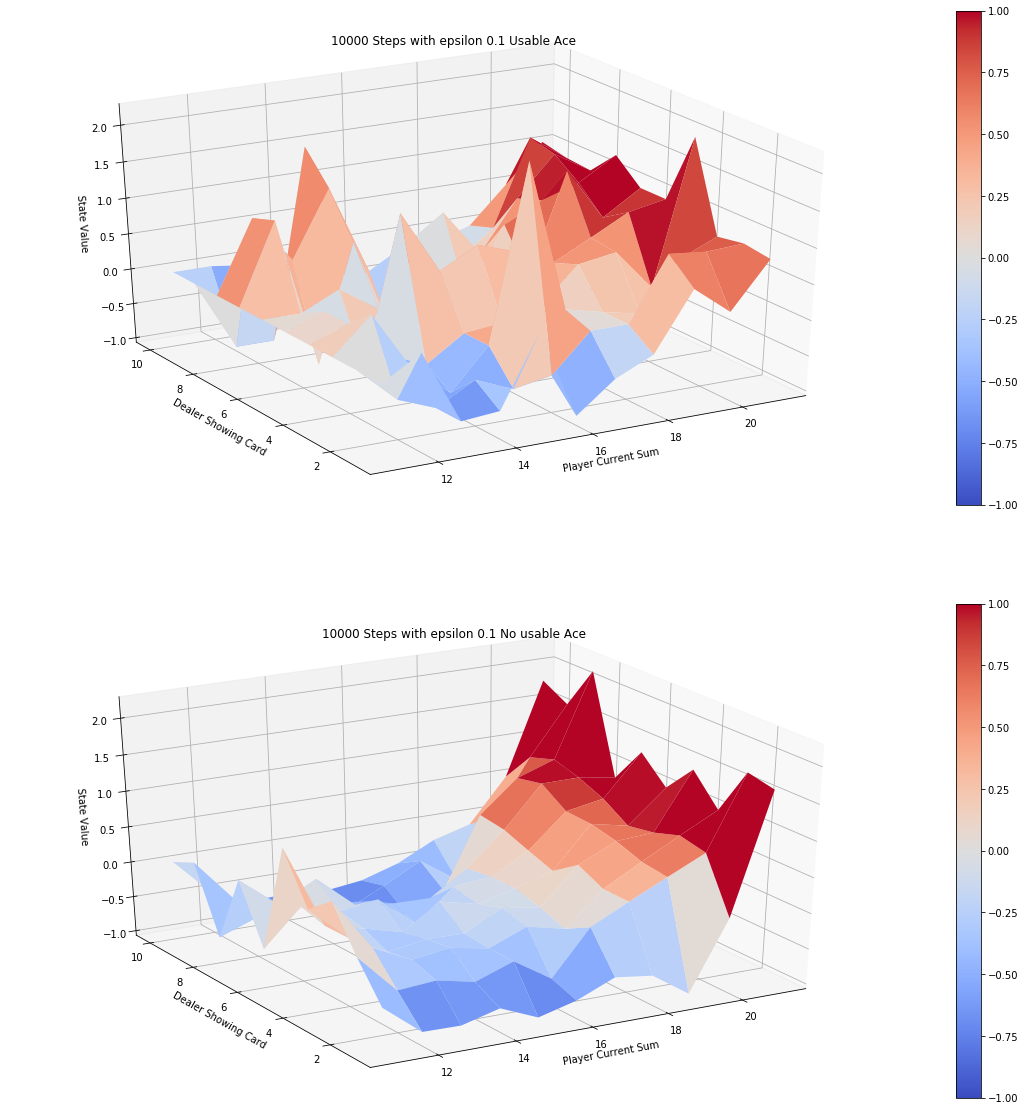

In [8]:
assembly(env, 10000, 1, 0.1)

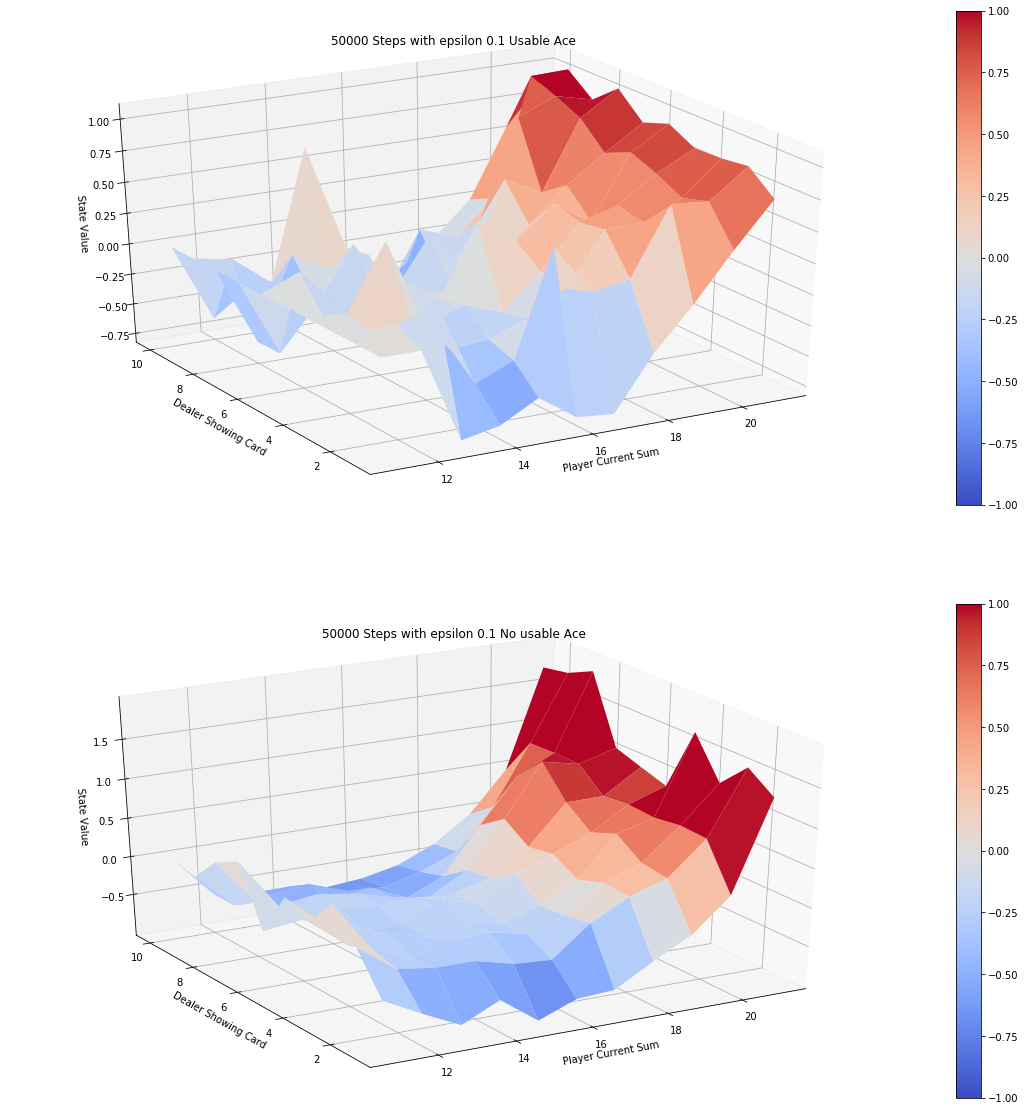

In [9]:
assembly(env, 50000, 1, 0.1)